In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
house = pd.read_csv('house_price_prediction.csv')

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house = house.drop(["Id"],1)
data_num = house.select_dtypes(include=np.number)
data_num.isnull().sum()


MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [5]:
data_num['LotFrontage'].fillna(data_num['LotFrontage'].mean(),inplace=True)
data_num['GarageYrBlt'].fillna(data_num['GarageYrBlt'].mean(),inplace=True)
data_num['MasVnrArea'].fillna(data_num['MasVnrArea'].mean(),inplace=True)
data_num.isnull().sum()

E:\Ananconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [6]:
data_char = house.select_dtypes(exclude=np.number)
data_char = data_char.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],1)

In [7]:
data_char.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [8]:
data_char["MasVnrType"].fillna(data_char["MasVnrType"].mode()[0],inplace=True)
data_char["BsmtQual"].fillna(data_char["BsmtQual"].mode()[0],inplace=True)
data_char["BsmtCond"].fillna(data_char["BsmtCond"].mode()[0],inplace=True)
data_char["BsmtExposure"].fillna(data_char["BsmtExposure"].mode()[0],inplace=True)
data_char["BsmtFinType1"].fillna(data_char["BsmtFinType1"].mode()[0],inplace=True)
data_char["BsmtFinType2"].fillna(data_char["BsmtFinType2"].mode()[0],inplace=True)
data_char["Electrical"].fillna(data_char["Electrical"].mode()[0],inplace=True)
data_char["GarageType"].fillna(data_char["GarageType"].mode()[0],inplace=True)
data_char["GarageFinish"].fillna(data_char["GarageFinish"].mode()[0],inplace=True)
data_char["GarageQual"].fillna(data_char["GarageQual"].mode()[0],inplace=True)
data_char["GarageCond"].fillna(data_char["GarageCond"].mode()[0],inplace=True)

In [9]:
data_char.isnull().sum().sum()

0

In [10]:
housef=pd.concat([data_num,data_char],1)

In [11]:
housef.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [12]:
credit = pd.read_csv('UCI_Credit_Card.csv')

In [13]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [14]:
credit['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [15]:
credit0 = credit[credit['default.payment.next.month']==0]

In [16]:
credit0=credit0[0:6636]

In [17]:
credit0.shape

(6636, 25)

In [18]:
credit1 = credit[credit['default.payment.next.month']==1]

In [19]:
credit1.shape
credit = credit.drop(["ID"],1)

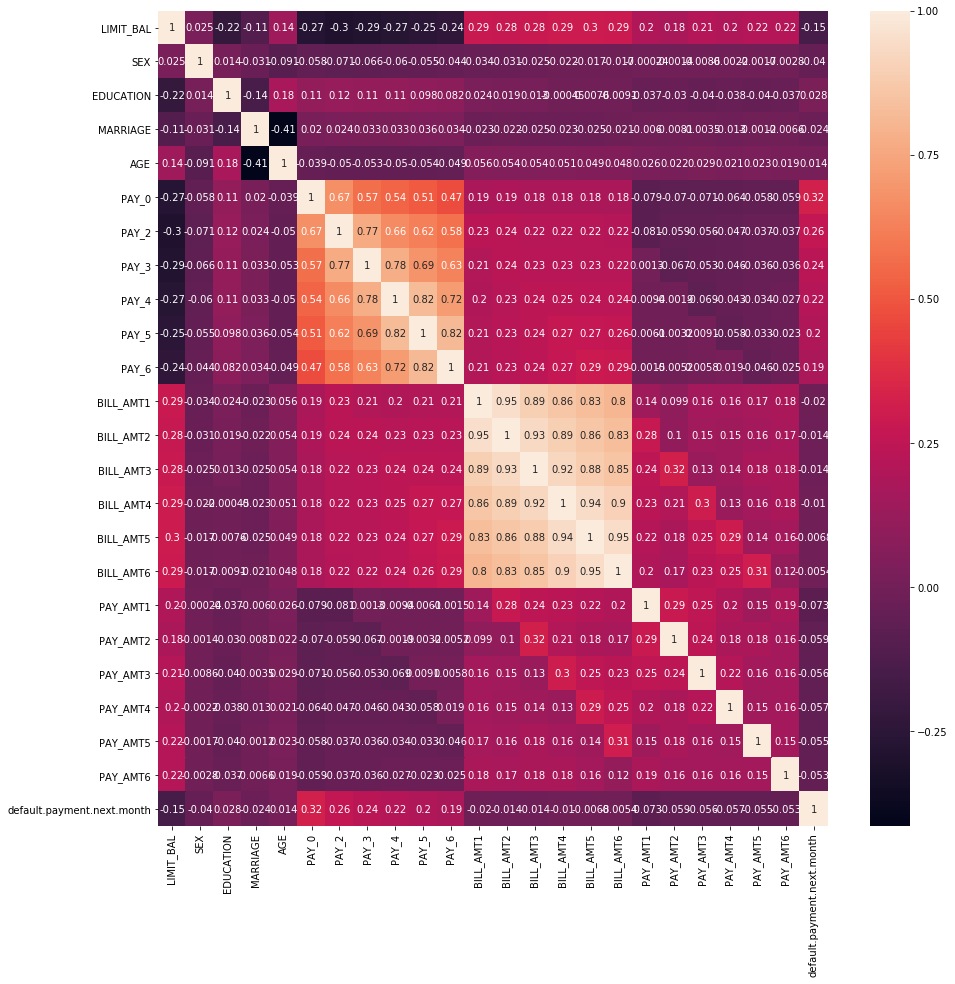

In [20]:
###Feature Selection
import seaborn as sns
plt.subplots(figsize=(15,15))
sns.heatmap(credit.corr(),annot=True)


In [21]:
###Train-test split
X=credit.drop(['default.payment.next.month'],1)
y=credit["default.payment.next.month"]
from sklearn.model_selection import train_test_split as tts

In [22]:
x_train,x_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

E:\Ananconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
from sklearn.metrics import confusion_matrix,roc_auc_score
confusion_matrix(y_test,y_pred)
roc_auc_score(y_test,y_pred)

0.5

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.00      0.00      0.00      1960

   micro avg       0.78      0.78      0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



E:\Ananconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Ananconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Ananconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7822222222222223

In [28]:
from sklearn.model_selection import cross_val_score
cv_logreg = cross_val_score(logreg,x_train,y_train,cv = 10,scoring='accuracy')

E:\Ananconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Ananconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Ananconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Ananconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Ananconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Ananconda3\lib\site-pa

In [29]:
cv_logreg.mean()


0.7772381682215908

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

E:\Ananconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
confusion_matrix(y_test,y_pred)

array([[6593,  447],
       [1345,  615]], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred)

0.8008888888888889

In [40]:
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,roc_auc_score
roc_auc_score(y_test,y_pred)

0.6251405960111317

In [36]:
cols = ['model name','accuracy','precision','recall','f1_score','roc_auc_score']

In [50]:
metricsdf = pd.DataFrame(columns = cols)

In [64]:
metricsdf = metricsdf.append(pd.Series(['Logistic Regression',
                            accuracy_score(y_test,y_pred),
                            precision_score(y_test,y_pred),
                            recall_score(y_test,y_pred),
                            f1_score(y_test,y_pred),
                            roc_auc_score(y_test,y_pred)],index=metricsdf.columns),ignore_index=True)

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
ypred = rfc.predict(x_test)

E:\Ananconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [65]:
metricsdf = metricsdf.append(pd.Series(['Random Forest Classifier',
                            accuracy_score(y_test,ypred),
                            precision_score(y_test,ypred),
                            recall_score(y_test,ypred),
                            f1_score(y_test,ypred),
                            roc_auc_score(y_test,ypred)],index=metricsdf.columns),ignore_index=True)

In [66]:
metricsdf

,model name,accuracy,precision,recall,f1_score,roc_auc_score
0,Logistic Regression,0.800889,0.579096,0.313776,0.407015,0.625141
1,Random Forest Classifier,0.804778,0.600000,0.310714,0.409412,0.626522


In [68]:
metricsdf.to_csv('Metrics_Model_Runs.csv')